# Introduction

My goal with this project is to deeply understand the dynamics of the stock market and provide insights that help investors make more informed decisions. By analyzing 20 years of historical Google stock data, I aim to uncover trends, measure volatility, and predict future price movements using advanced machine learning techniques. This analysis is designed to deliver actionable insights that enhance investment and trading strategies.

## Goal

The primary objective of my project is to predict Google’s future stock prices based on historical data. Leveraging advanced algorithms such as Long Short-Term Memory (LSTM) models, I aim to identify patterns and trends that guide investment decisions and minimize risks. By doing so, my goal is to empower investors and traders to make data-driven decisions with confidence.

### Methodology

**1. Data Source:**
 
- I worked with 20 years of Google stock data, including daily opening, closing, high, and low prices, along with trading volumes.
- The dataset was sourced from Kaggle: Google Stock Data 20 Years.

**2. Data Preparation:**

- I processed raw data by handling missing values and removing anomalies.
- The data was scaled and transformed into time-series sequences to ensure compatibility with LSTM models.


**3. Baseline Models:**

- I started with basic machine learning models like Linear Regression and Random Forest to establish initial benchmarks for performance.

**4. Advanced Modeling:**

- To capture complex temporal patterns, I implemented LSTM models and optimized them using hyperparameter tuning and callback methods such as EarlyStopping.

**5. Evaluation and Visualization:**

- I evaluated my models using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R².

- I visualized predictions alongside actual stock prices to provide clear insights into model performance.

### Scope

This project helped me develop a strong understanding of stock market analysis. I believe it can be especially useful for investors and traders in the following areas:

**Identify Historical Trends**  Gaining insights into long-term and short-term market movements.

**Anticipate Volatility**  Predicting price fluctuations to minimize risks.

**Enhance Strategies:** Using data-driven insights to optimize investment and trading strategies.

The methods and analyses I developed in this project bridge the gap between technical analysis and actionable financial strategies. This allows for a robust tool to understand Google stock behavior and predict future price movements effectively.

# Data Cleaning and Preprocessing

### Imports

In [1]:
# Core Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing and Scaling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Evaluation Metrics
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score,
    mean_absolute_percentage_error
)

# Deep Learning Libraries (Keras / TensorFlow)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [2]:
data = pd.read_csv(r'C:\Users\Elif Surucu\Documents\Flatiron\Assesments\Project4\Google-Stock-Market-Data\data.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Volatility,Month,Volume_Category
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2004,0.201743,8,Very High
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2004,0.213699,8,Very High
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2004,0.110336,8,Very High
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2004,0.200000,8,Very High
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2004,0.102616,8,Very High


In [3]:
print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512   

   Year  Volatility  Month Volume_Category  
0  2004    0.201743      8       Very High  
1  2004    0.213699      8       Very High  
2  2004    0.110336      8       Very High  
3  2004    0.200000      8       Very High  
4  2004    0.102616      8       Very High  


In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936 entries, 0 to 4935
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4936 non-null   object 
 1   Open             4936 non-null   float64
 2   High             4936 non-null   float64
 3   Low              4936 non-null   float64
 4   Close            4936 non-null   float64
 5   Adj Close        4936 non-null   float64
 6   Volume           4936 non-null   int64  
 7   Year             4936 non-null   int64  
 8   Volatility       4936 non-null   float64
 9   Month            4936 non-null   int64  
 10  Volume_Category  4936 non-null   object 
dtypes: float64(6), int64(3), object(2)
memory usage: 424.3+ KB
None
              Open         High          Low        Close    Adj Close  \
count  4936.000000  4936.000000  4936.000000  4936.000000  4936.000000   
mean     43.077417    43.532659    42.644088    43.096952    43.096952   
std 

In [5]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Ensure no duplicates
data = data.drop_duplicates()

# Recheck missing values
print("Missing values after cleaning:\n", data.isnull().sum())


Missing values after cleaning:
 Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Year               0
Volatility         0
Month              0
Volume_Category    0
dtype: int64


In [6]:

if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Handle invalid dates gracefully

# Extract the day of the week from the 'Date' column
if 'Date' in data.columns:
    data['DayOfWeek'] = data['Date'].dt.day_name()  # Converts dates to day names (e.g., Monday, Tuesday)

# Encode the 'DayOfWeek' column if it exists
if 'DayOfWeek' in data.columns:
    label_encoder = LabelEncoder()
    data['DayOfWeek_Encoded'] = label_encoder.fit_transform(data['DayOfWeek'])
    data = data.drop(columns=['DayOfWeek'])  # Drop original column after encoding

# Encode the 'Volume_Category' column if it exists
if 'Volume_Category' in data.columns:
    label_encoder = LabelEncoder()
    data['Volume_Category_Encoded'] = label_encoder.fit_transform(data['Volume_Category'])
    data = data.drop(columns=['Volume_Category'])  # Drop original column after encoding

# Drop unrelated columns for correlation analysis
columns_to_drop = ['Date']
columns_to_drop += ['Volume_Category'] if 'Volume_Category' in data.columns else []

correlation_data = data.drop(columns=columns_to_drop, errors='ignore')  # Safely drop columns



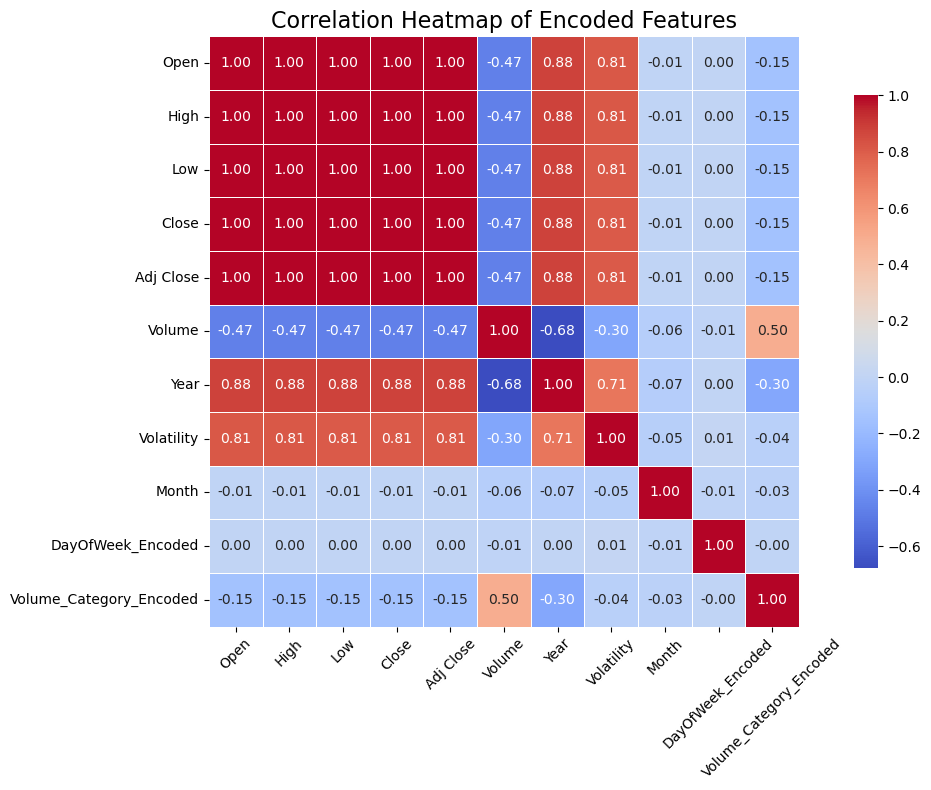

In [7]:
# Generate a correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(
    correlation_matrix, 
    annot=True,  
    fmt=".2f",  
    cmap="coolwarm", 
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},  
    square=True  
)


plt.title("Correlation Heatmap of Encoded Features", fontsize=16)
plt.xticks(rotation=45, fontsize=10)  
plt.yticks(fontsize=10) 
plt.tight_layout()  
plt.show()

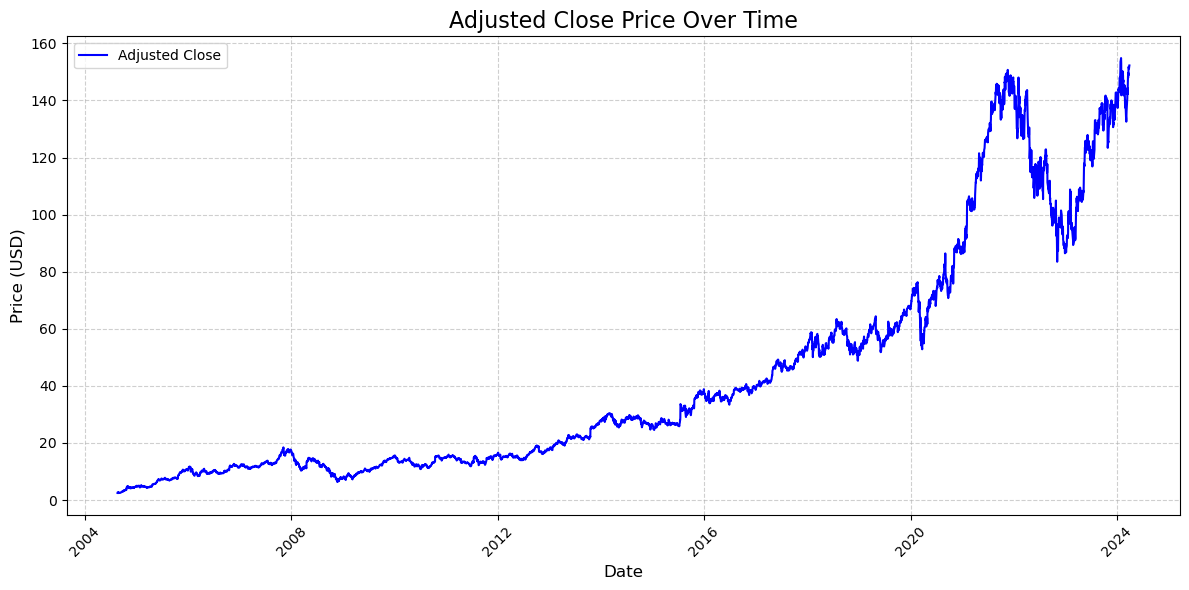

In [8]:
# Plot Adjusted Close Price over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Adj Close'], label='Adjusted Close', color='blue', linewidth=1.5)
plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

*The chart provides important information for both long-term and short-term investors:*

- For long-term investors: The stock looks like a positive investment vehicle with its general growth trend.
- For short-term investors: Increased volatility after 2020, with higher potential for gains, but also greater risk.

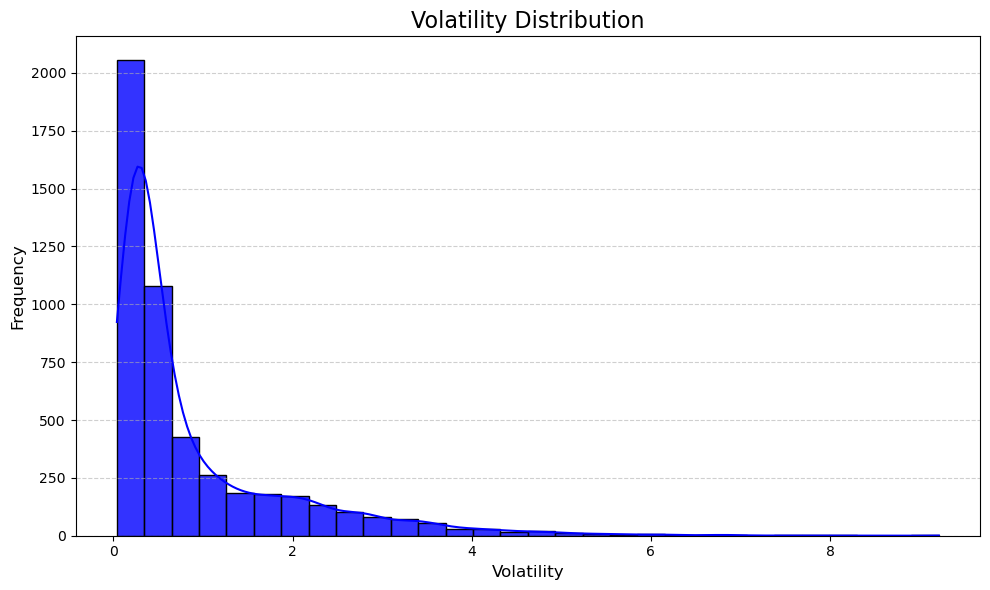

In [9]:
# Plot the distribution of volatility
plt.figure(figsize=(10, 6))
sns.histplot(data['Volatility'], kde=True, color='blue', bins=30, alpha=0.8) 
plt.title('Volatility Distribution', fontsize=16)
plt.xlabel('Volatility', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

*Risk Level:*

- Lower volatility generally means lower risk for investors. However, low volatility can also indicate that potential return opportunities may be limited.

*Possible Effects:*

- A market where volatility is rarely high may be more predictable, which may be attractive to long-term investors.

*Strategy:*

- Given that volatility is usually low, investors can adopt low-risk strategies.
- However, periods of high volatility (such as during economic crises or major events) should be considered and risk management should be implemented accordingly.

# Shotgun Method
This method is used to establish a baseline accuracy by evaluating multiple models simultaneously.

In [10]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score
)

# Define a custom RMSE function
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Step 1: Prepare Data
X = data[['Open', 'High', 'Low', 'Volume', 'Volatility']]  # Features
y = data['Adj Close']  # Target variable

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Step 2: Define Base Regressors
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Step 3: Train and Evaluate Models
metrics = {
    "R-squared": r2_score,
    "Mean Squared Error": mean_squared_error,
    "Mean Absolute Error": mean_absolute_error,
    "Explained Variance": explained_variance_score,
    "Root Mean Squared Error": root_mean_squared_error
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    # Calculate all metrics for each model
    results[model_name] = {
        metric_name: metric_function(y_test, y_pred) for metric_name, metric_function in metrics.items()
    }

# Step 4: Convert Results to a DataFrame for Visualization
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R-squared", ascending=False)  # Sort by R-squared score for comparison
print(results_df)




Train shape: (3702, 5), Test shape: (1234, 5)
                     R-squared  Mean Squared Error  Mean Absolute Error  \
Linear Regression     0.999918            0.135834             0.204132   
Random Forest         0.999849            0.249872             0.268261   
Gradient Boosting     0.999812            0.311542             0.341107   
K-Nearest Neighbors   0.999606            0.652912             0.473115   

                     Explained Variance  Root Mean Squared Error  
Linear Regression              0.999918                 0.368556  
Random Forest                  0.999849                 0.499872  
Gradient Boosting              0.999812                 0.558159  
K-Nearest Neighbors            0.999606                 0.808030  


Errors are minimal, R-squared value is almost perfect and Linear Regression is the best model for this dataset. It is fast, simple and gives the most accurate predictions.

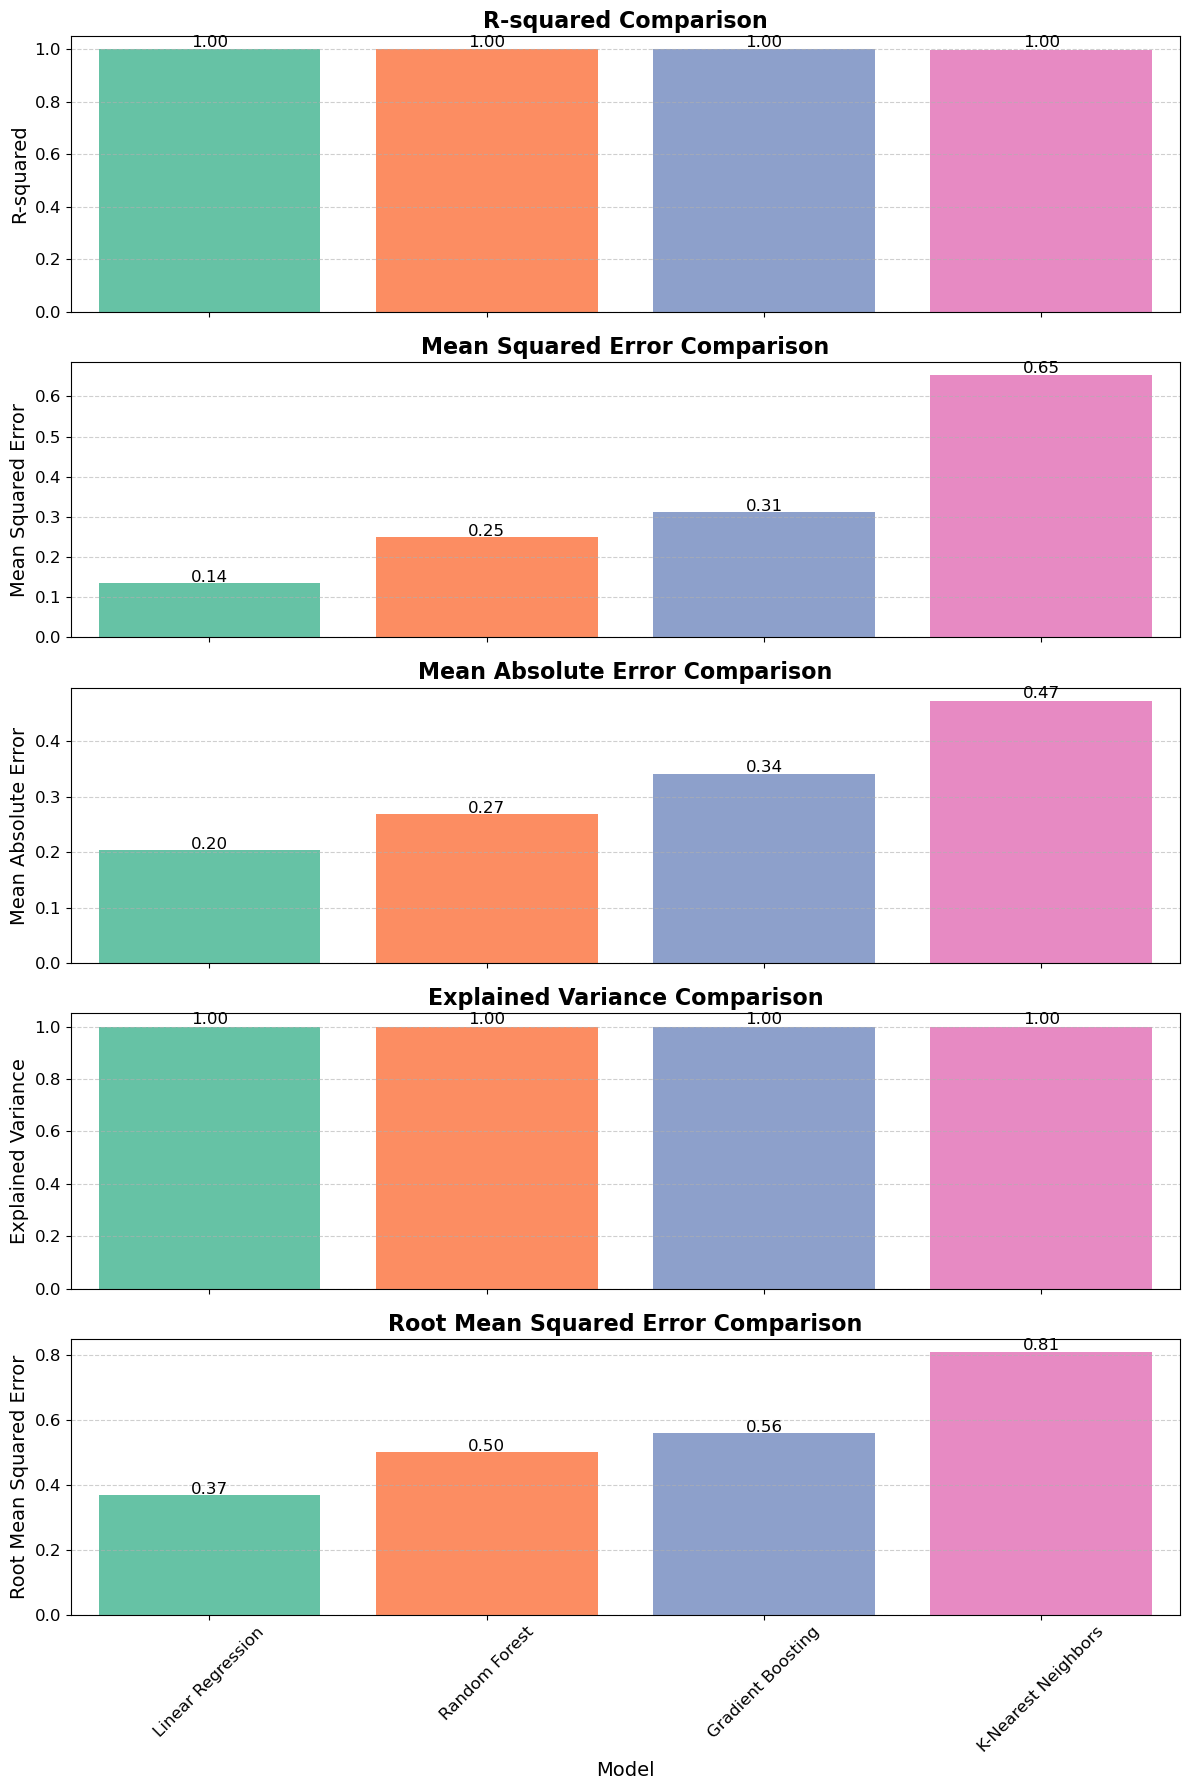

In [11]:
# Visualize Model Performance with Vibrant Colors
fig, axes = plt.subplots(len(results_df.columns), 1, figsize=(12, 18), sharex=True)

# Vibrant color palette
palette = sns.color_palette("Set2")

# Visualize each metric
for i, metric_name in enumerate(results_df.columns):  # Iterate through metric names
    ax = axes[i]
    
    # Create a DataFrame for easier plotting
    plot_data = pd.DataFrame({
        'Model': results_df.index,
        'Score': results_df[metric_name]
    })

    # Barplot
    sns.barplot(
        data=plot_data,
        x='Model',
        y='Score',
        ax=ax,
        dodge=False  # Ensures compatibility without `hue`
    )
    
    # Manually set colors since hue is not used
    for bar, color in zip(ax.patches, palette[:len(plot_data)]):
        bar.set_facecolor(color)

    # Set plot titles and labels
    ax.set_title(f'{metric_name} Comparison', fontsize=16, fontweight='bold')
    ax.set_ylabel(metric_name, fontsize=14)
    ax.set_xlabel('Model', fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Add value labels to the bars
    for bar in ax.patches:
        bar_height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar_height + 0.01 * bar_height,
            f'{bar_height:.2f}',
            ha='center',
            fontsize=12
        )

# Adjust layout for better readability
plt.tight_layout()
plt.show()


Linear Regression shows the best performance in terms of both MSE and MAE!

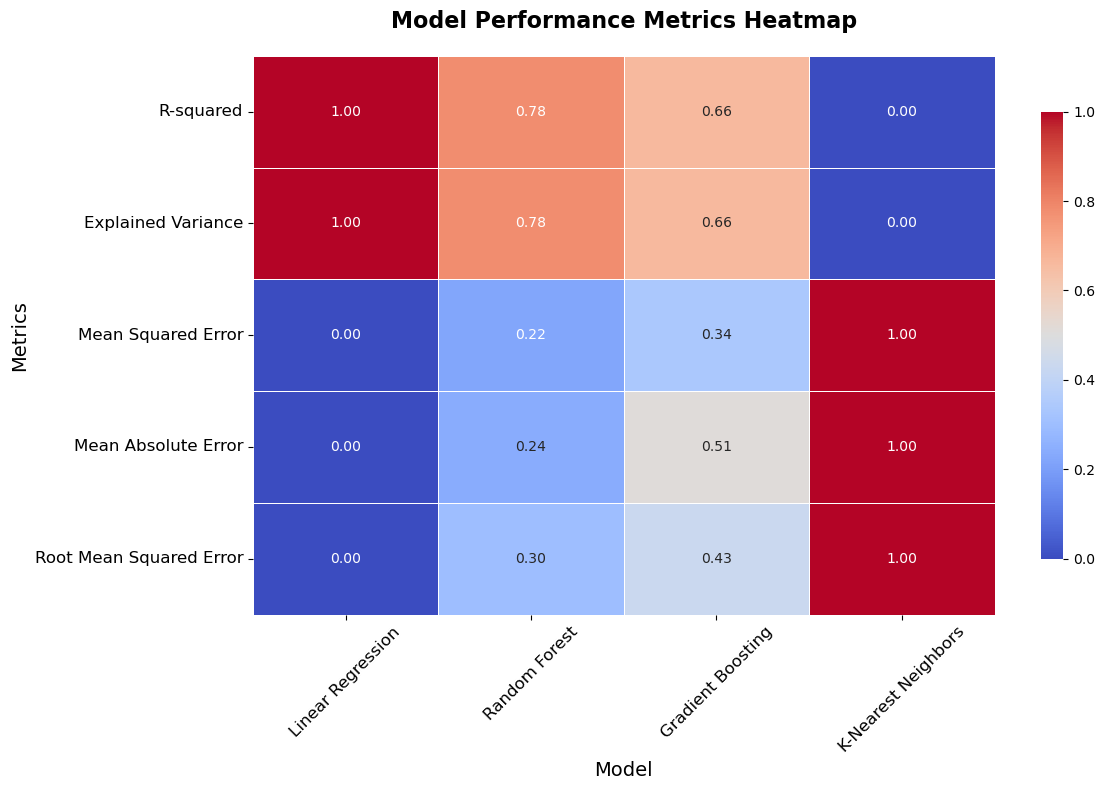

In [12]:
# Define model metrics
model_metrics = {
    'Linear Regression': {
        'R-squared': 0.999918,
        'Explained Variance': 0.999918,
        'Mean Squared Error': 0.135834,
        'Mean Absolute Error': 0.204132,
        'Root Mean Squared Error': 0.368556,
    },
    'Random Forest': {
        'R-squared': 0.999849,
        'Explained Variance': 0.999849,
        'Mean Squared Error': 0.249872,
        'Mean Absolute Error': 0.268261,
        'Root Mean Squared Error': 0.499872,
    },
    'Gradient Boosting': {
        'R-squared': 0.999812,
        'Explained Variance': 0.999812,
        'Mean Squared Error': 0.311542,
        'Mean Absolute Error': 0.341107,
        'Root Mean Squared Error': 0.558159,
    },
    'K-Nearest Neighbors': {
        'R-squared': 0.999606,
        'Explained Variance': 0.999606,
        'Mean Squared Error': 0.652912,
        'Mean Absolute Error': 0.473115,
        'Root Mean Squared Error': 0.808030,
    },
}

# Define metric names and extract model names
metric_names = ['R-squared', 'Explained Variance', 'Mean Squared Error', 
                'Mean Absolute Error', 'Root Mean Squared Error']
model_names = list(model_metrics.keys())

# Initialize a DataFrame for metrics
metrics_df = pd.DataFrame(index=model_names, columns=metric_names)

# Populate the DataFrame with scaled metrics
scaler = MinMaxScaler()

for metric in metric_names:
    scores = np.array([model_metrics[model][metric] for model in model_names]).reshape(-1, 1)
    scaled_scores = scaler.fit_transform(scores).flatten()
    metrics_df[metric] = scaled_scores

# Transpose for easier plotting
metrics_df_transposed = metrics_df.T

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    metrics_df_transposed,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

# Customize the heatmap
plt.title("Model Performance Metrics Heatmap", fontsize=16, weight="bold", pad=20)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Metrics", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save and display the heatmap
plt.savefig('model_metrics_heatmap.png', dpi=300, transparent=True)
plt.show()


The Random Forest model seems to have the highest score in terms of R-squared!

# Moving into Advanced Machine Learning

In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'Volatility']]  # Features
y = data['Adj Close']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model with optimized parameters
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=200,  # Increased number of trees
    learning_rate=0.05,  # Lower learning rate for better generalization
    max_depth=6,  # Increased depth for capturing complex patterns
    subsample=0.8,  # Randomly sample 80% of data for training each tree
    colsample_bytree=0.8,  # Randomly sample 80% of features for training each tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")




Mean Squared Error: 0.3243
Mean Absolute Error: 0.3072
R-squared: 0.9998


<Figure size 1000x800 with 0 Axes>

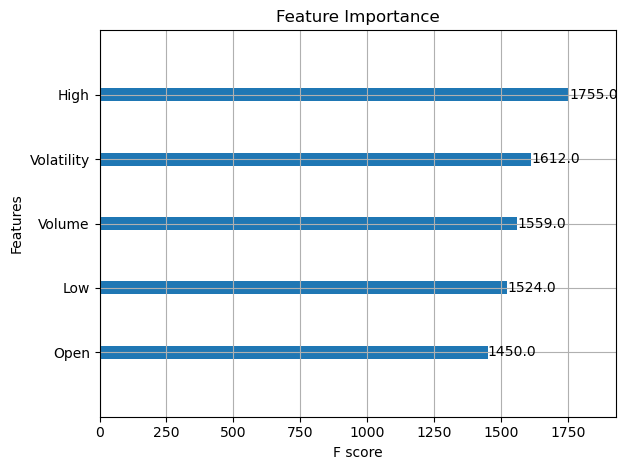

In [14]:
# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_model, importance_type='weight', title="Feature Importance")
plt.tight_layout()
plt.show()

*Predictive Power:*

- Features such as High and Volatility can increase the predictive power of your model. You should especially protect these features and keep them at the forefront of your analysis.

*Feature Reduction:*

- If you need to reduce the number of features, you can remove features with low importance such as Open. However, model performance should be retested before doing this.

*Adding New Features:*

- Features such as High, Volatility and Volume can be considered to carry more information. For example, new features derived from these features (for example, price differences or moving averages) can increase model performance.

Epoch 1/50
123/123 [==============================] - 15s 57ms/step - loss: 1.0695 - val_loss: 0.3116 - lr: 0.0010
Epoch 2/50
123/123 [==============================] - 5s 39ms/step - loss: 0.0763 - val_loss: 0.1177 - lr: 0.0010
Epoch 3/50
123/123 [==============================] - 5s 39ms/step - loss: 0.0093 - val_loss: 0.1049 - lr: 0.0010
Epoch 4/50
123/123 [==============================] - 5s 40ms/step - loss: 0.0021 - val_loss: 0.1456 - lr: 0.0010
Epoch 5/50
123/123 [==============================] - 5s 40ms/step - loss: 0.0015 - val_loss: 0.1031 - lr: 0.0010
Epoch 6/50
123/123 [==============================] - 5s 39ms/step - loss: 0.0012 - val_loss: 0.1265 - lr: 0.0010
Epoch 7/50
123/123 [==============================] - 5s 42ms/step - loss: 0.0012 - val_loss: 0.1009 - lr: 0.0010
Epoch 8/50
123/123 [==============================] - 5s 39ms/step - loss: 0.0011 - val_loss: 0.1013 - lr: 0.0010
Epoch 9/50
123/123 [==============================] - 5s 44ms/step - loss: 0.0010 - val

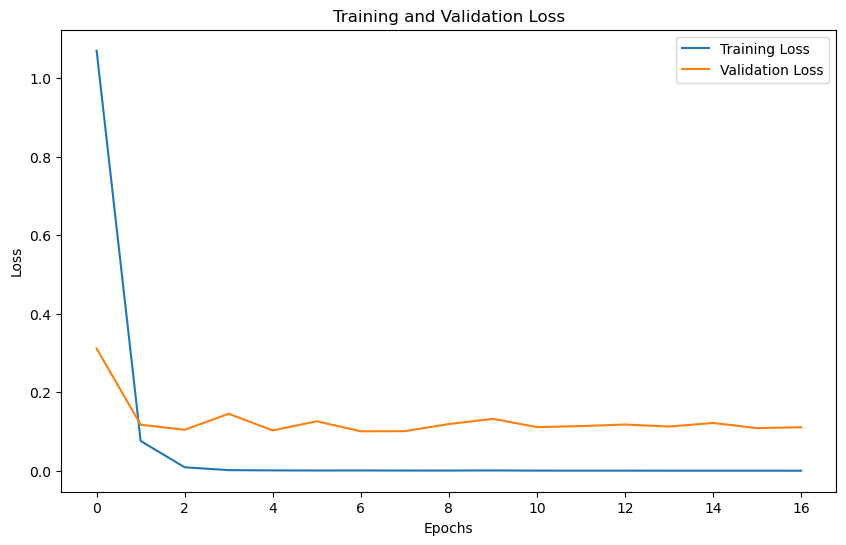

In [15]:

# Define features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Adj Close'

# Scale features
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()
scaled_features = scaler_features.fit_transform(data[features])
scaled_target = scaler_target.fit_transform(data[[target]])

# Create sequences for LSTM
def create_sequences(features, target, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(features)):
        X.append(features[i-time_steps:i])
        y.append(target[i])
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_sequences(scaled_features, scaled_target, time_steps)

# Split the data into train and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    LSTM(32, return_sequences=False, kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(50, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Use early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate and plot results
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Training loss approaches zero very quickly. This indicates that the model has learned the training data very well. However, this rapid decrease may increase the possibility that the model is overfitting the training data.

31/31 [==============================] - 2s 13ms/step


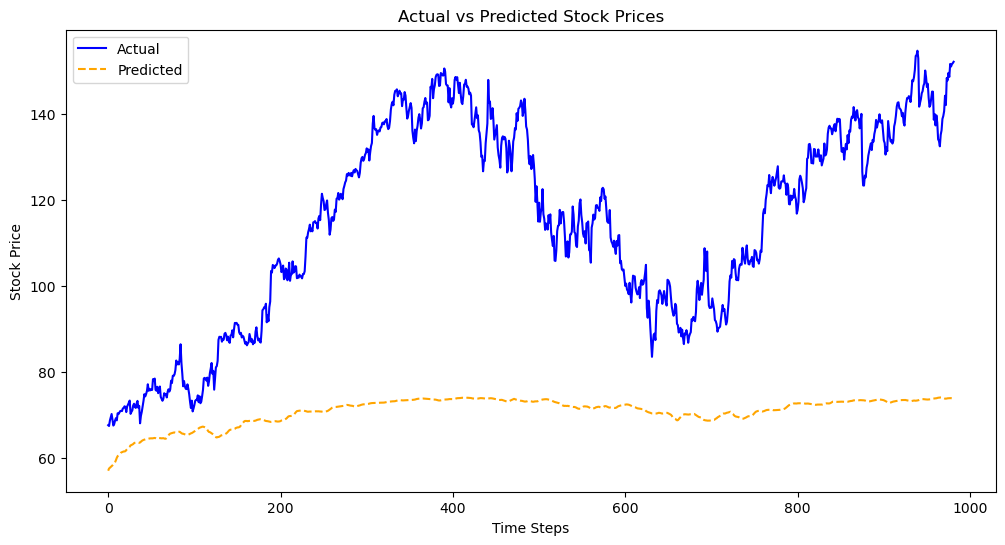

In [16]:
# Predictions
y_pred = model.predict(X_test)

# Rescale the predictions and actual values back to original scale
y_test_rescaled = scaler_target.inverse_transform(y_test)
y_pred_rescaled = scaler_target.inverse_transform(y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual', color='blue')
plt.plot(y_pred_rescaled, label='Predicted', color='orange', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

This graph clearly shows that the model in its current form is insufficiently accurate and requires improvement!!!

# Neural Network (Sniper Approach) - LSTM 

*Here's a revised version of our code that employs both custom neural network architecture and principles for fine-tuning to achieve higher performance.* 
- The updates include adjustments to make it more "task-focused" while considering transfer learning concepts and a sniper approach.

Epoch 1/100
49/49 [==============================] - 136s 2s/step - loss: 11.2304 - val_loss: 1.6007 - lr: 0.0010
Epoch 2/100
49/49 [==============================] - 117s 2s/step - loss: 0.5162 - val_loss: 0.1183 - lr: 0.0010
Epoch 3/100
49/49 [==============================] - 119s 2s/step - loss: 0.0473 - val_loss: 0.0453 - lr: 0.0010
Epoch 4/100
49/49 [==============================] - 120s 2s/step - loss: 0.0107 - val_loss: 0.0707 - lr: 0.0010
Epoch 5/100
49/49 [==============================] - 123s 3s/step - loss: 0.0062 - val_loss: 0.0602 - lr: 0.0010
Epoch 6/100
49/49 [==============================] - 123s 3s/step - loss: 0.0045 - val_loss: 0.0626 - lr: 0.0010
Epoch 7/100
49/49 [==============================] - 122s 2s/step - loss: 0.0041 - val_loss: 0.0641 - lr: 0.0010
Epoch 8/100
49/49 [==============================] - ETA: 0s - loss: 0.0041
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 120s 2s/step - 

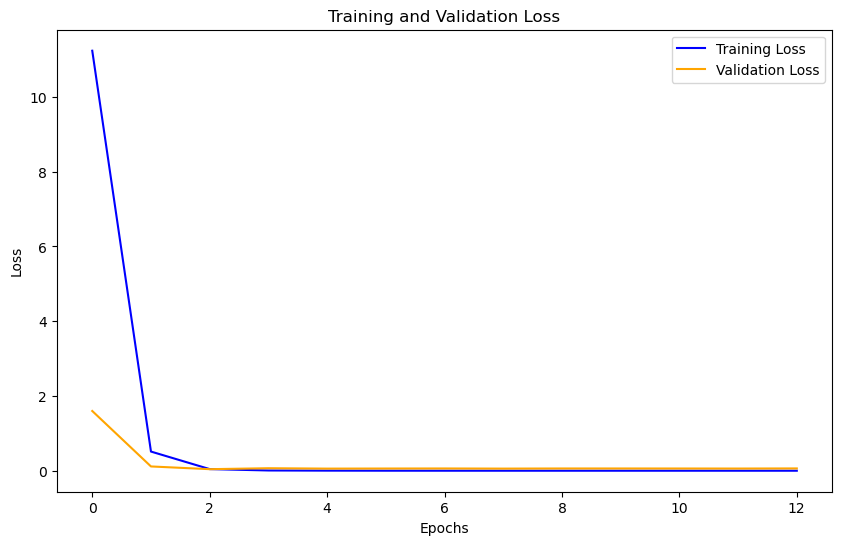

29/29 [==============================] - 15s 435ms/step


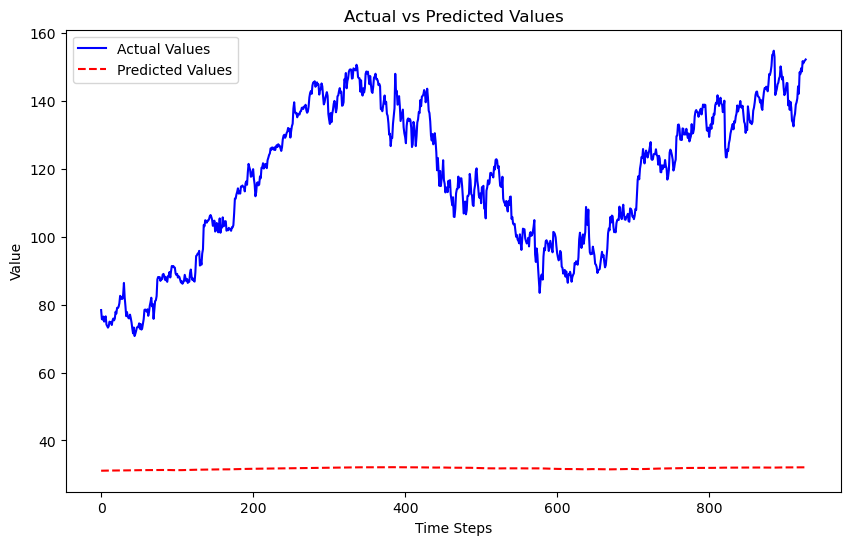

In [18]:
features = ['Open', 'High', 'Low', 'Volume']  # Replace with your feature columns
target = 'Adj Close'  # Replace with your target column

# Scale features and target
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

scaled_features = scaler_features.fit_transform(data[features])
scaled_target = scaler_target.fit_transform(data[[target]])

# Split into train and test sets
split = int(len(scaled_features) * 0.8)
X_train_raw, X_test_raw = scaled_features[:split], scaled_features[split:]
y_train_raw, y_test_raw = scaled_target[:split], scaled_target[split:]

# Function to reshape data for LSTM
def reshape_data(X, y, time_steps):
    X_lstm, y_lstm = [], []
    for i in range(time_steps, len(X)):
        X_lstm.append(X[i - time_steps:i])
        y_lstm.append(y[i])
    return np.array(X_lstm), np.array(y_lstm)

time_steps = 60
X_train, y_train = reshape_data(X_train_raw, y_train_raw, time_steps)
X_test, y_test = reshape_data(X_test_raw, y_test_raw, time_steps)

# Define the LSTM model
model = Sequential()

# First LSTM layer
model.add(Bidirectional(LSTM(
    units=512,
    return_sequences=True,
    input_shape=(X_train.shape[1], X_train.shape[2]),
    kernel_regularizer=l2(0.01)
)))
model.add(Dropout(0.4))

# Second LSTM layer
model.add(Bidirectional(LSTM(
    units=256,
    return_sequences=True,
    kernel_regularizer=l2(0.01)
)))
model.add(Dropout(0.4))

# Third LSTM layer
model.add(Bidirectional(LSTM(
    units=128,
    kernel_regularizer=l2(0.01)
)))
model.add(Dropout(0.3))

# Fully connected Dense layer
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(units=1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Learning rate scheduler and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Reverse scaling for actual vs predicted comparison
y_test_rescaled = scaler_target.inverse_transform(y_test)
y_pred_rescaled = scaler_target.inverse_transform(y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Values', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Values', color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

Adding Attention Mechanism to improve performance can be a very effective method, especially in an LSTM-based model!

Epoch 1/100
49/49 [==============================] - 132s 2s/step - loss: 11.2336 - val_loss: 1.6106 - lr: 0.0010
Epoch 2/100
49/49 [==============================] - 119s 2s/step - loss: 0.5158 - val_loss: 0.1211 - lr: 0.0010
Epoch 3/100
49/49 [==============================] - 127s 3s/step - loss: 0.0461 - val_loss: 0.0387 - lr: 0.0010
Epoch 4/100
49/49 [==============================] - 126s 3s/step - loss: 0.0088 - val_loss: 0.0114 - lr: 0.0010
Epoch 5/100
49/49 [==============================] - 125s 3s/step - loss: 0.0018 - val_loss: 0.0317 - lr: 0.0010
Epoch 6/100
49/49 [==============================] - 129s 3s/step - loss: 7.9645e-04 - val_loss: 0.0108 - lr: 0.0010
Epoch 7/100
49/49 [==============================] - 121s 2s/step - loss: 0.0029 - val_loss: 0.0562 - lr: 0.0010
Epoch 8/100
49/49 [==============================] - 127s 3s/step - loss: 0.0042 - val_loss: 0.0656 - lr: 0.0010
Epoch 9/100
49/49 [==============================] - 128s 3s/step - loss: 0.0042 - val_loss

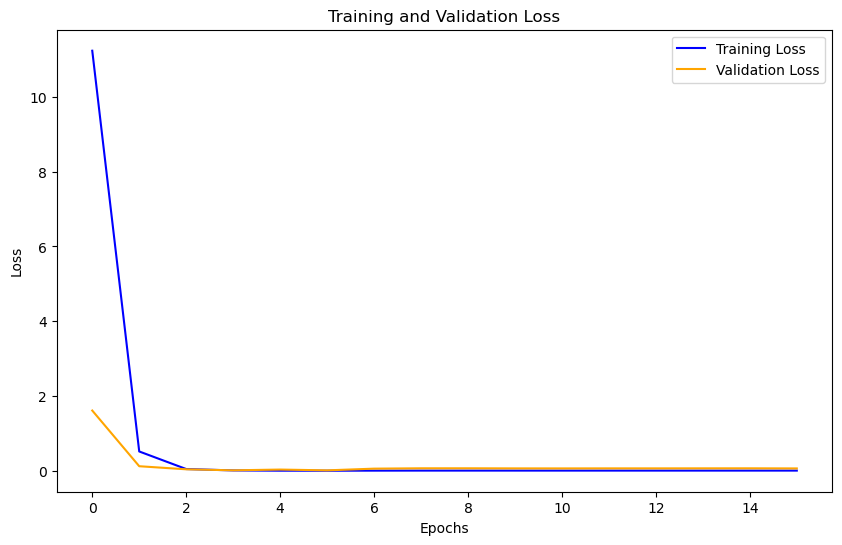

29/29 [==============================] - 16s 467ms/step


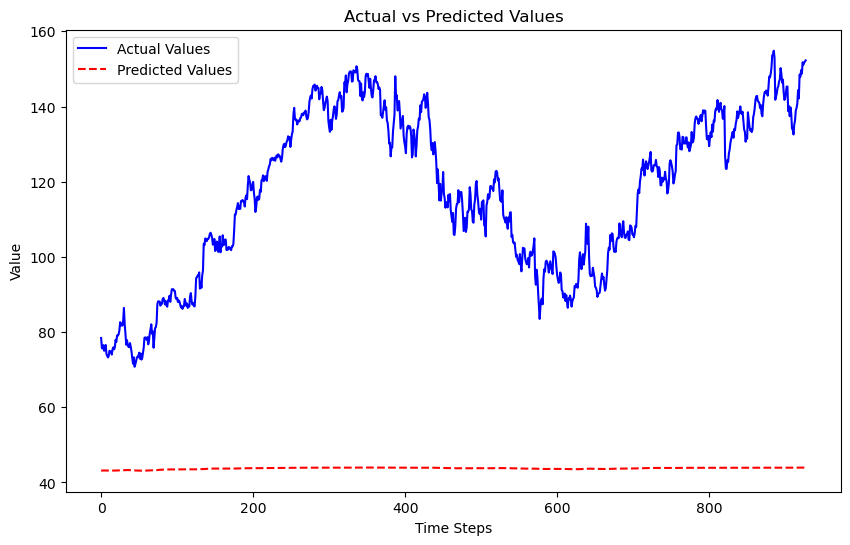

In [23]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import tensorflow as tf  # TensorFlow'u burada ekliyoruz
from sklearn.preprocessing import MinMaxScaler

# Attention Layer Definition
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(
            name="attention_weight",
            shape=(input_shape[-1], input_shape[-1]),
            initializer="random_normal",
            trainable=True
        )
        self.b = self.add_weight(
            name="attention_bias",
            shape=(input_shape[-1],),
            initializer="random_normal",
            trainable=True
        )
        self.v = self.add_weight(
            name="attention_vector",
            shape=(input_shape[-1],),
            initializer="random_normal",
            trainable=True
        )
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.nn.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        a = tf.nn.softmax(tf.tensordot(e, self.v, axes=1), axis=1)
        output = tf.reduce_sum(x * tf.expand_dims(a, -1), axis=1)
        return output

# Data Preparation
features = ['Open', 'High', 'Low', 'Volume']
target = 'Adj Close'

scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

scaled_features = scaler_features.fit_transform(data[features])
scaled_target = scaler_target.fit_transform(data[[target]])

# Split data
time_steps = 60
split = int(len(scaled_features) * 0.8)
X_train_raw, X_test_raw = scaled_features[:split], scaled_features[split:]
y_train_raw, y_test_raw = scaled_target[:split], scaled_target[split:]

def reshape_data(X, y, time_steps):
    X_lstm, y_lstm = [], []
    for i in range(time_steps, len(X)):
        X_lstm.append(X[i-time_steps:i])
        y_lstm.append(y[i])
    return np.array(X_lstm), np.array(y_lstm)

X_train, y_train = reshape_data(X_train_raw, y_train_raw, time_steps)
X_test, y_test = reshape_data(X_test_raw, y_test_raw, time_steps)

# Define the model with Attention
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

x = Bidirectional(LSTM(512, return_sequences=True, kernel_regularizer=l2(0.01)))(inputs)
x = Dropout(0.4)(x)

x = Bidirectional(LSTM(256, return_sequences=True, kernel_regularizer=l2(0.01)))(x)
x = Dropout(0.4)(x)

x = Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))(x)
x = Dropout(0.3)(x)

attention = Attention()(x)
dense = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(attention)
output = Dense(1)(dense)

model = Model(inputs=inputs, outputs=output)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Reverse scaling for comparison
y_test_rescaled = scaler_target.inverse_transform(y_test)
y_pred_rescaled = scaler_target.inverse_transform(y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Values', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Values', color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()


*1. Training and Validation Loss Graph:* The training process of the model seems stable, but it can be played with different hyperparameters (e.g. learning rate, batch size) for further improvements.

*2. Actual vs Predicted Values ​​Chart :* This indicates that the model's predictive capacity is insufficient or the output activation is not set correctly.

Epoch 1/50
122/122 [==============================] - 12s 62ms/step - loss: 0.0113 - val_loss: 4.0661e-04 - lr: 0.0010
Epoch 2/50
122/122 [==============================] - 6s 52ms/step - loss: 0.0031 - val_loss: 5.4051e-04 - lr: 0.0010
Epoch 3/50
122/122 [==============================] - 6s 52ms/step - loss: 0.0031 - val_loss: 8.9871e-04 - lr: 0.0010
Epoch 4/50
122/122 [==============================] - 6s 49ms/step - loss: 0.0024 - val_loss: 5.7293e-04 - lr: 0.0010
Epoch 5/50
122/122 [==============================] - 6s 50ms/step - loss: 0.0024 - val_loss: 2.8854e-04 - lr: 0.0010
Epoch 6/50
122/122 [==============================] - 7s 57ms/step - loss: 0.0022 - val_loss: 5.3822e-04 - lr: 0.0010
Epoch 7/50
122/122 [==============================] - 8s 62ms/step - loss: 0.0022 - val_loss: 2.3353e-04 - lr: 0.0010
Epoch 8/50
122/122 [==============================] - 6s 51ms/step - loss: 0.0017 - val_loss: 2.0890e-04 - lr: 0.0010
Epoch 9/50
122/122 [==============================] - 7

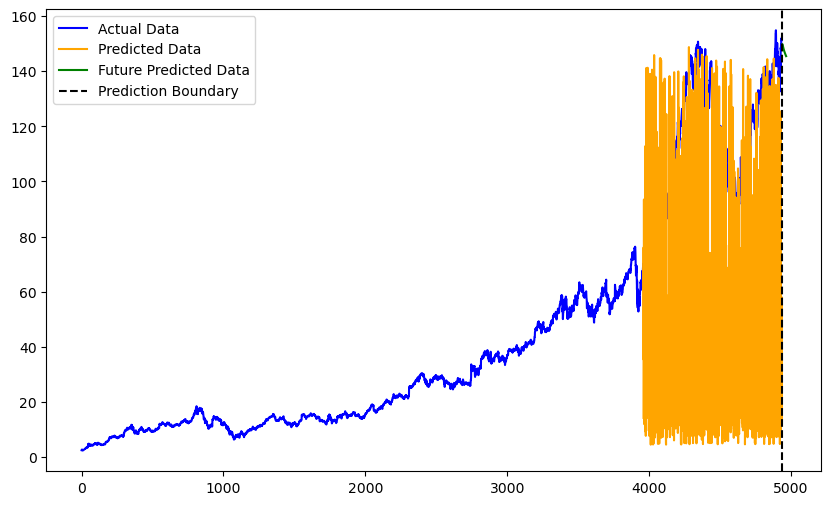

In [62]:

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(32, return_sequences=False),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)


def forecast_future(data, model, time_steps, future_steps):
    future_predictions = []
    input_seq = data[-time_steps:]  # Son zaman adımı kadar veriyi al

    for _ in range(future_steps):  # Gelecekteki adımlar boyunca tahmin yap
        prediction = model.predict(input_seq.reshape(1, time_steps, -1))
        future_predictions.append(prediction[0, 0])  # Tahmin edilen değeri listeye ekle
        input_seq = np.append(input_seq[1:], prediction, axis=0)  # Yeni tahmin diziyi güncelle

    return np.array(future_predictions)


future_steps = 30
future_predictions = forecast_future(data_scaled, model, time_steps, future_steps)
future_predictions_rescaled = scaler.inverse_transform(future_predictions.reshape(-1, 1))


plt.figure(figsize=(10, 6))
plt.plot(range(len(data_scaled)), scaler.inverse_transform(data_scaled), label='Actual Data', color='blue')
plt.plot(range(len(data_scaled) - len(y_test), len(data_scaled)), y_pred_rescaled, label='Predicted Data', color='orange')
plt.plot(range(len(data_scaled), len(data_scaled) + future_steps), future_predictions_rescaled, label='Future Predicted Data', color='green')
plt.axvline(x=len(data_scaled), color='black', linestyle='--', label='Prediction Boundary')
plt.legend()
plt.show()
